In [1]:
!pwd

/workspaces/tensorflow-wavelets/src


In [2]:
import cv2
import tensorflow as tf

from tensorflow_wavelets.utils.models import *
from tensorflow_wavelets.utils.mse import *
from tensorflow_wavelets.utils.data import *

from matplotlib import pyplot as plt
import numpy as np


In [4]:
img = cv2.imread("../Development/input/Lenna_orig.png", 0)
img = cv2.resize(img,(240,240))
img_t = np.expand_dims(img, axis=-1)
img_ex = np.expand_dims(img_t, axis=0)
print(img_ex.shape)


(1, 240, 240, 1)


In [5]:
dwt = DWT.DWT(wavelet_name="haar",concat=0)(tf.dtypes.cast(img_ex, tf.float32))
print(dwt.shape)
idwt = DWT.IDWT(wavelet_name="haar",splited=1)(tf.dtypes.cast(dwt, tf.float32))
print(idwt.shape)

2022-05-25 20:34:49.859623: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


(1, 120, 120, 4)
(1, 240, 240, 1)


In [45]:

def pyramid_avg_pool_2d(input, levels=4):
    plt.figure(figsize=(16,8))
    columns = levels
    for idx in range(levels):
        plt.subplot(1, columns, idx + 1)
        plt.imshow(input[0,:,:,0], cmap='gray')
        input = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same')(tf.dtypes.cast(input, tf.float32))
        # input = np.expand_dims(input, axis=-1)
        


def pyramid(layer, input, levels=4):
    plt.figure(figsize=(16,8))
    columns = levels
    for idx in range(levels):
        plt.subplot(1, columns, idx + 1)
        plt.imshow(input[0,:,:,0], cmap='gray')
        coeffs = layer(tf.dtypes.cast(input, tf.float32))
        LL1 = coeffs[:,:,:,0]
        input = np.expand_dims(LL1, axis=-1)
        # print(input.shape)

def plot_ll_lh_hl_hh(dwt):
    plt.figure(figsize=(16,8))

    plt.subplot(1, 4, 1)
    plt.imshow(dwt[0,:,:, 0], cmap='gray')
    plt.gca().set_title('LL')


    plt.subplot(1, 4, 2)
    plt.imshow(dwt[0,:,:, 1], cmap='gray')
    plt.gca().set_title('LH')


    plt.subplot(1, 4, 3)
    plt.gca().set_title('HL')
    plt.imshow(dwt[0,:,:, 2], cmap='gray')


    plt.subplot(1, 4, 4)
    plt.gca().set_title('HH')
    plt.imshow(dwt[0,:,:, 3], cmap='gray')

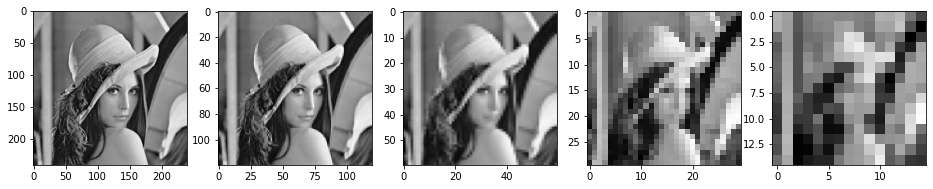

In [6]:
pyramid_avg_pool_2d(img_ex, levels=5)

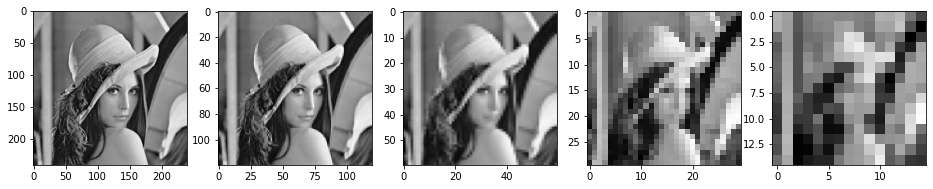

In [7]:
pyramid(DWT.DWT(wavelet_name="haar",concat=0), img_ex, levels=5)

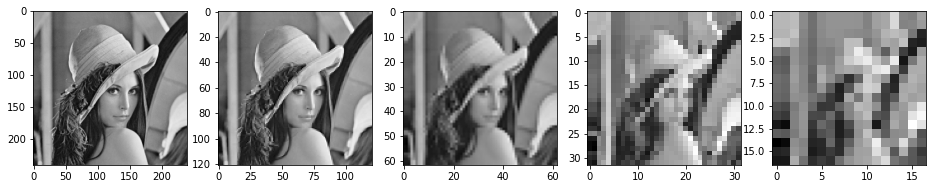

In [8]:
pyramid(DWT.DWT(wavelet_name="db2",concat=0), img_ex, levels=5)

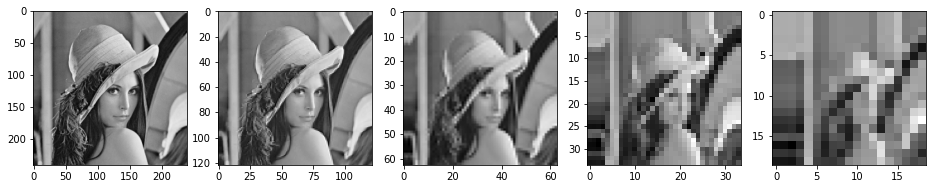

In [9]:
pyramid(DWT.DWT(wavelet_name="db3",concat=0), img_ex, levels=5)

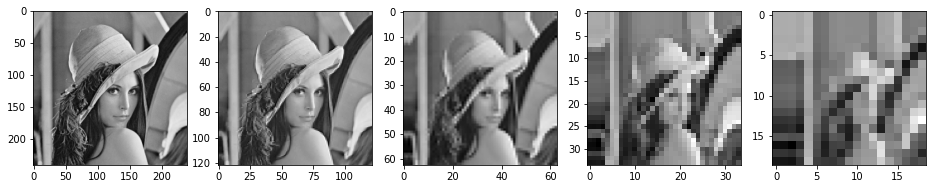

In [10]:
pyramid(DWT.DWT(wavelet_name="sym3",concat=0), img_ex, levels=5)

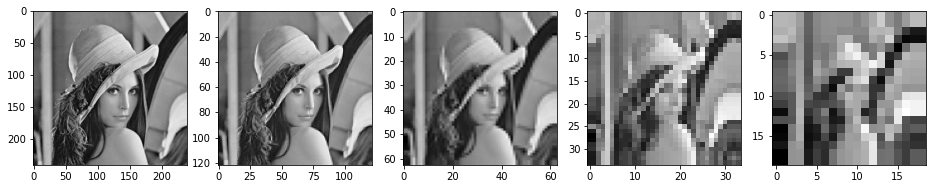

In [11]:
pyramid(DWT.DWT(wavelet_name="bior1.3",concat=0), img_ex, levels=5)

(1, 240, 240, 1)


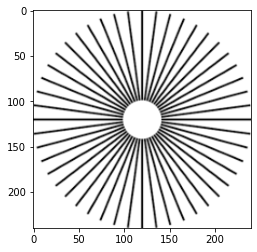

In [39]:
img = cv2.imread("/workspaces/tensorflow-wavelets/test_image.png", 0)
img = cv2.resize(img,(240,240))
img_t = np.expand_dims(img, axis=-1)
img_ex = np.expand_dims(img_t, axis=0)
print(img_ex.shape)
plt.imshow(img, cmap='gray')

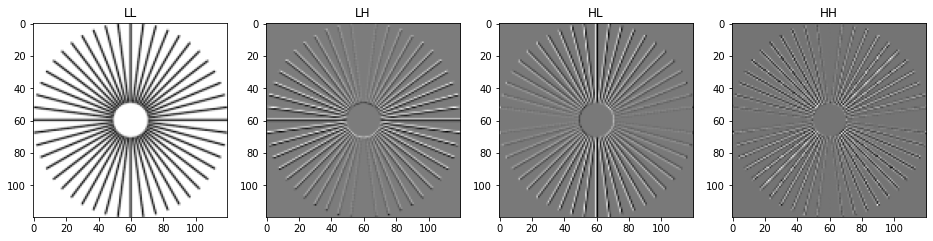

In [51]:
def iter_plot_ll_lh_hl_hh(img, number_of_iter, wavelet_name):
    LL = img
    for i in range(number_of_iter):
        dwt = DWT.DWT(wavelet_name=wavelet_name,concat=0)(tf.dtypes.cast(LL, tf.float32))
        plot_ll_lh_hl_hh(dwt)
        LL = dwt[0,:,:, 0]
        LL = np.expand_dims(LL, axis=-1)
        LL = np.expand_dims(LL, axis=0)
        print(LL.shape)


(1, 122, 122, 1)
(1, 63, 63, 1)
(1, 34, 34, 1)
(1, 19, 19, 1)


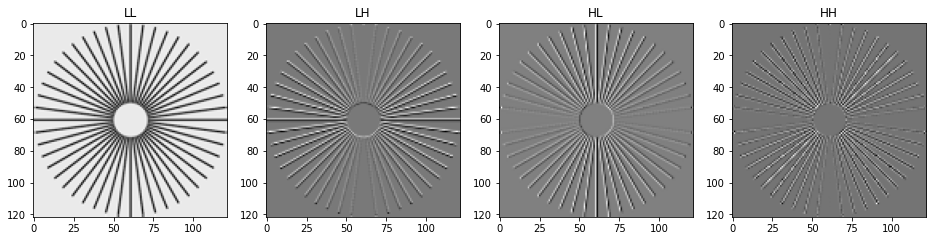

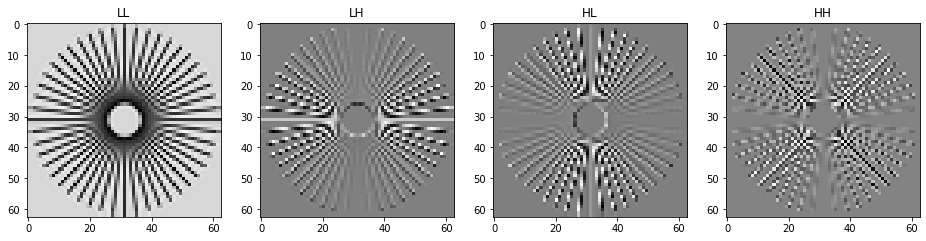

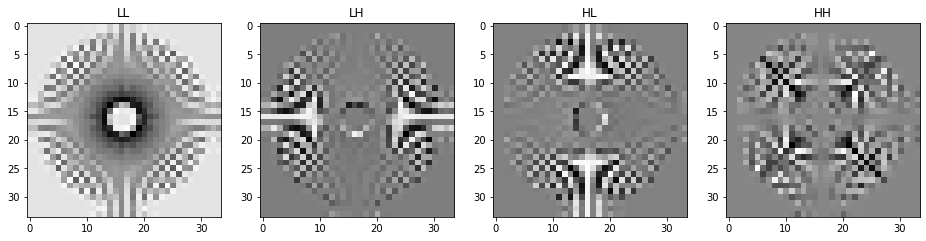

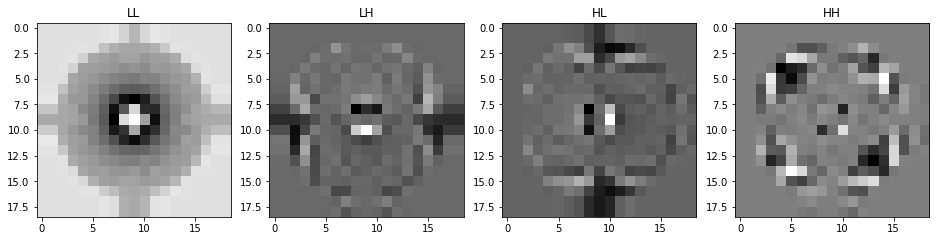

In [52]:
iter_plot_ll_lh_hl_hh(img_ex, 4, "bior1.3")

(1, 122, 122, 1)
(1, 63, 63, 1)
(1, 34, 34, 1)
(1, 19, 19, 1)


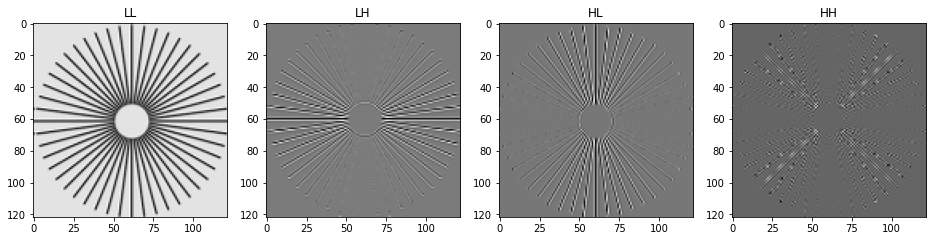

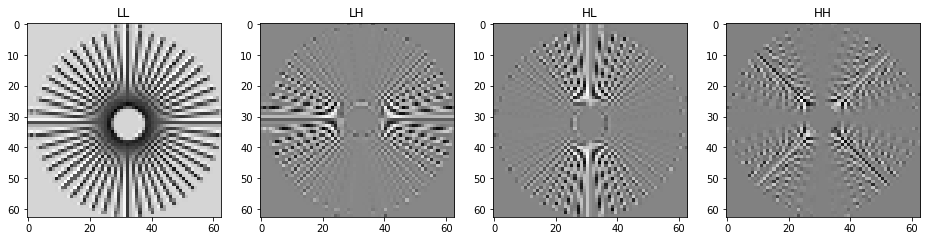

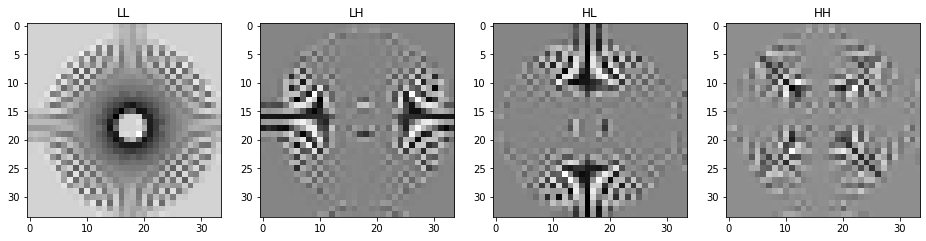

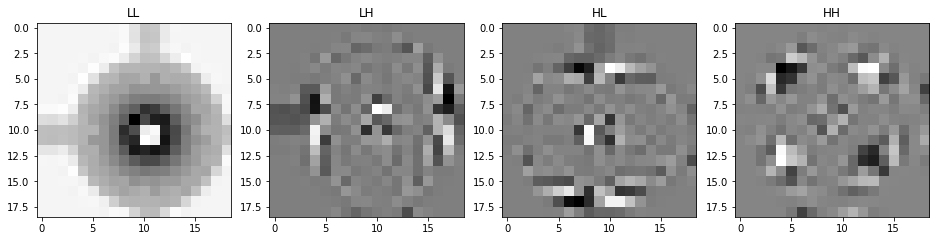

In [53]:

iter_plot_ll_lh_hl_hh(img_ex, 4, "sym3")


(1, 121, 121, 1)
(1, 62, 62, 1)
(1, 32, 32, 1)
(1, 17, 17, 1)


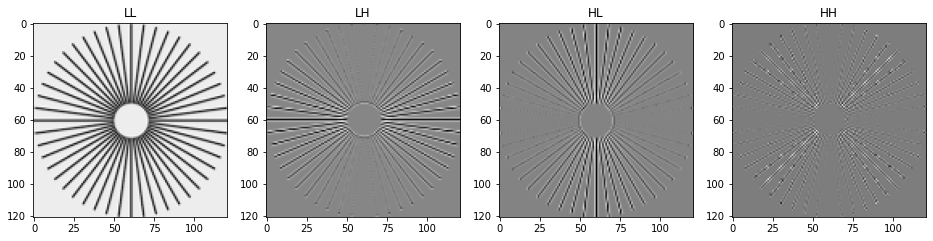

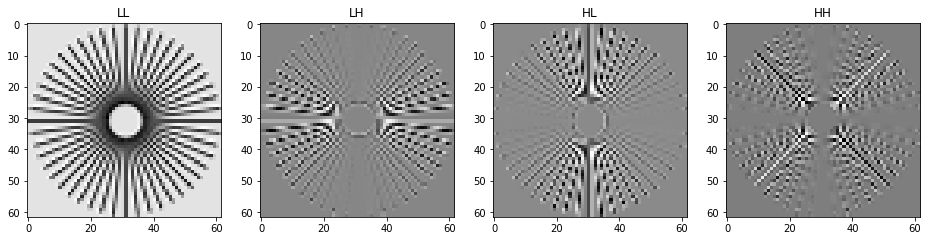

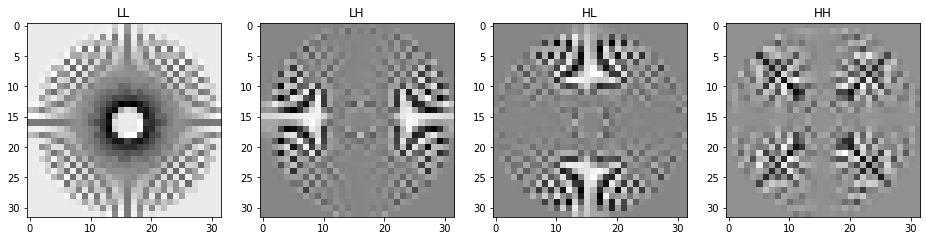

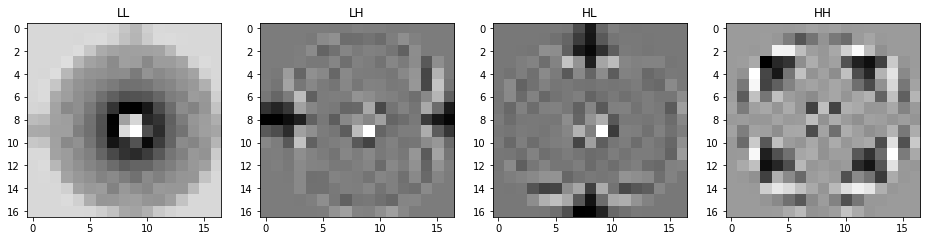

In [54]:

iter_plot_ll_lh_hl_hh(img_ex, 4, "db2")

(1, 120, 120, 1)
(1, 60, 60, 1)
(1, 30, 30, 1)
(1, 15, 15, 1)


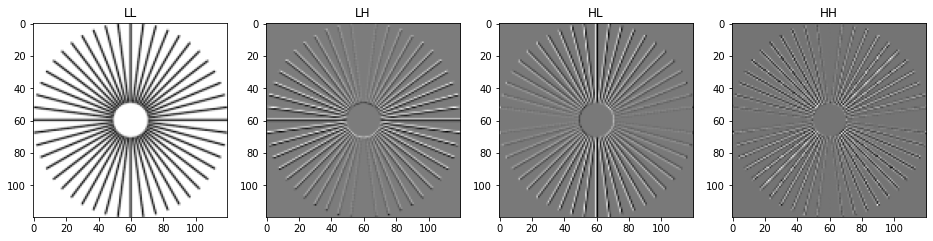

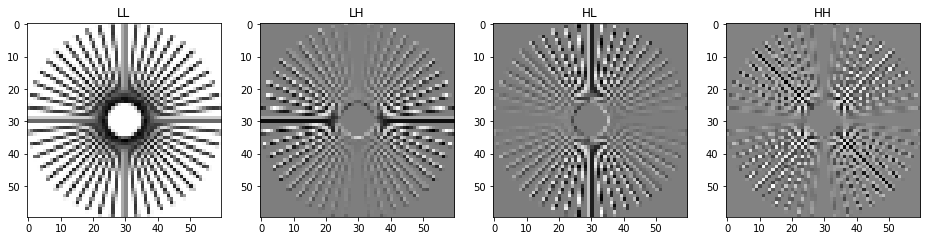

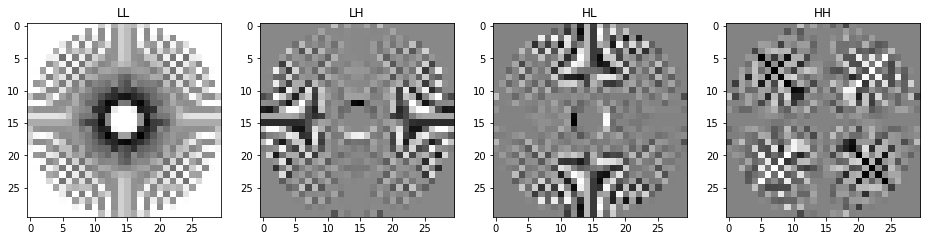

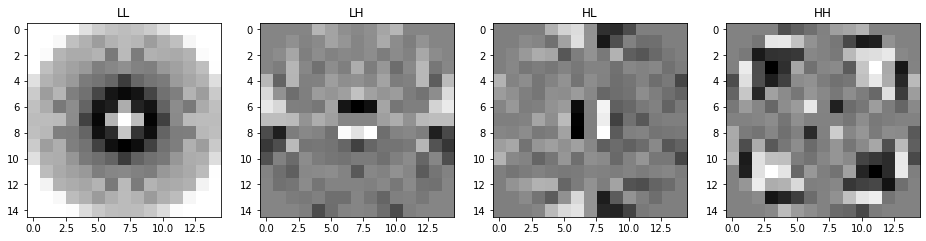

In [55]:
iter_plot_ll_lh_hl_hh(img_ex, 4, "haar")